# Use of neural network for food recognition to develop recipe retrieval application

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset contains 10 classes, these are:

* fried rice
* ginger pork saute
* chip butty
* chinese soup
* sweet and sour pork
* pork cutllet on rice
* takoyaki
* fried fish
* dried fish
* beef noodle

Each has class have 10 instances for training data


### External Dependencies used in the project

* **NumPy** is a Python library that stands for "Numerical Python." It provides a set of tools for working with arrays and matrices of numerical data, making it an essential library for scientific computing in Python.

* **TensorFlow** is an open-source software library used to build and train machine learning models, particularly deep neural networks, by providing a set of high-level abstractions for building and running computations on large-scale distributed systems. 

* **Matplotlib** is a Python library used for creating static, animated, and interactive visualizations in Python. It provides a wide variety of plotting functions and styles for creating 2D and 3D plots, histograms, scatterplots, and other types of visualizations.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras

## Data gathering

In [4]:
image_size_ds = (256,256)
batch_size_ds = 32
seed_ds = 25

In [5]:
dataset_path = "/content/drive/MyDrive/deep_learning/dataset"
test_dataset_path = "/content/drive/MyDrive/deep_learning/test_dataset"



train_ds = tf.keras.utils.image_dataset_from_directory(dataset_path,image_size=image_size_ds,validation_split=0.2, batch_size=batch_size_ds,subset="training",seed=seed_ds)
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_path,image_size=image_size_ds,validation_split=0.2, batch_size=batch_size_ds,subset="validation",seed=seed_ds)

test_ds = tf.keras.utils.image_dataset_from_directory(test_dataset_path,image_size=image_size_ds,batch_size=batch_size_ds,seed=seed_ds)

Found 100 files belonging to 10 classes.
Using 80 files for training.
Found 100 files belonging to 10 classes.
Using 20 files for validation.
Found 100 files belonging to 10 classes.


## Display sample images

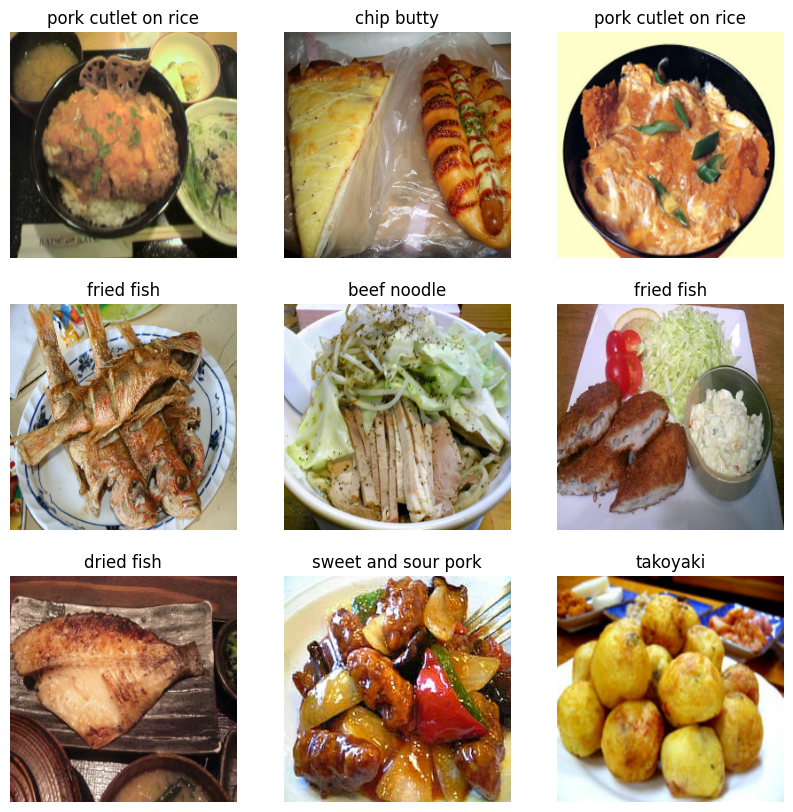

In [6]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    downSampled_image = images[i].numpy().astype("uint8")    
    
    plt.imshow(downSampled_image)
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Image preprocessing

In [7]:
normalization = tf.keras.layers.Rescaling(1./255)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomContrast(factor=0.5),
    layers.RandomZoom(height_factor= 0.5, width_factor=0.5)
    ])

## Model selection

In [8]:
from tensorflow.keras import initializers

num_classes = len(class_names)

model_1 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu',kernel_initializer= initializers.HeNormal(), bias_initializer=initializers.RandomNormal()),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu',kernel_initializer= initializers.HeNormal(), bias_initializer=initializers.RandomNormal()),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu',kernel_initializer= initializers.HeNormal(), bias_initializer=initializers.RandomNormal()),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation = 'softmax')
])


model_2 = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu',kernel_initializer= initializers.HeNormal(), bias_initializer=initializers.RandomNormal()),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu',kernel_initializer= initializers.HeNormal(), bias_initializer=initializers.RandomNormal()),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu',kernel_initializer= initializers.HeNormal(), bias_initializer=initializers.RandomNormal()),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation = 'softmax')
])

model_1.build(input_shape = (None, 256, 256, 3))
model_2.build(input_shape = (None, 256, 256, 3))

model_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])
model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

## Summary of models

In [9]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)       

In [10]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

## Model training

In [12]:
epochs=100

history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

history_2 = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
3/3 [==============================] - 15s 2s/step - loss: 9.2090 - sparse_categorical_accuracy: 0.0625 - val_loss: 7.0333 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/100
3/3 [==============================] - 0s 86ms/step - loss: 5.7875 - sparse_categorical_accuracy: 0.1125 - val_loss: 3.9526 - val_sparse_categorical_accuracy: 0.0500
Epoch 3/100
3/3 [==============================] - 0s 82ms/step - loss: 2.9962 - sparse_categorical_accuracy: 0.3375 - val_loss: 2.7667 - val_sparse_categorical_accuracy: 0.0500
Epoch 4/100
3/3 [==============================] - 0s 96ms/step - loss: 2.0392 - sparse_categorical_accuracy: 0.3250 - val_loss: 2.1643 - val_sparse_categorical_accuracy: 0.2000
Epoch 5/100
3/3 [==============================] - 0s 95ms/step - loss: 1.6117 - sparse_categorical_accuracy: 0.5250 - val_loss: 2.0809 - val_sparse_categorical_accuracy: 0.2000
Epoch 6/100
3/3 [==============================] - 0s 94ms/step - loss: 1.2224 - sparse_categorical_accuracy: 0

## Evaluation of the model

In [13]:
test_loss, test_accuracy = model_1.evaluate(test_ds)

4/4 [==============================] - 12s 64ms/step - loss: 4.1757 - sparse_categorical_accuracy: 0.2900


In [14]:
test_loss, test_accuracy = model_2.evaluate(test_ds)

4/4 [==============================] - 1s 23ms/step - loss: 3.4512 - sparse_categorical_accuracy: 0.3200


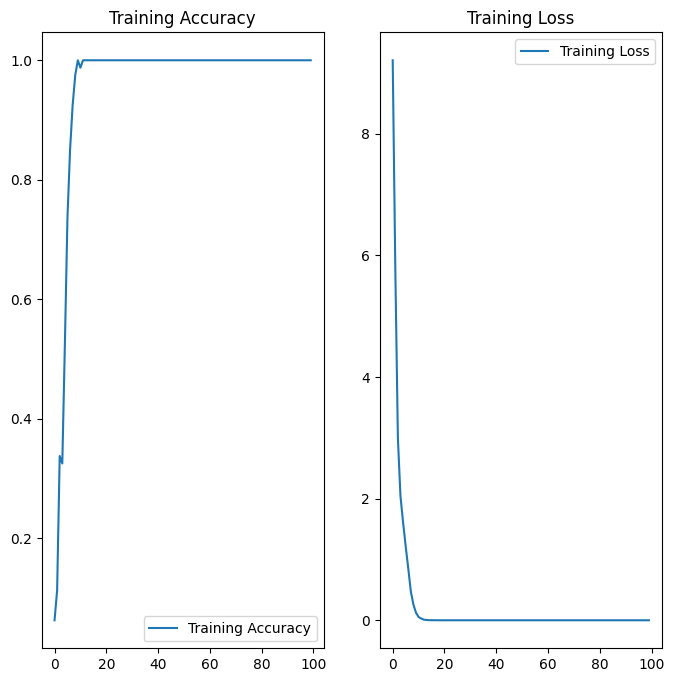

In [16]:
acc = history_1.history['sparse_categorical_accuracy']
loss = history_1.history['loss']


acc_2 = history_2.history['sparse_categorical_accuracy']
loss_2 = history_2.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

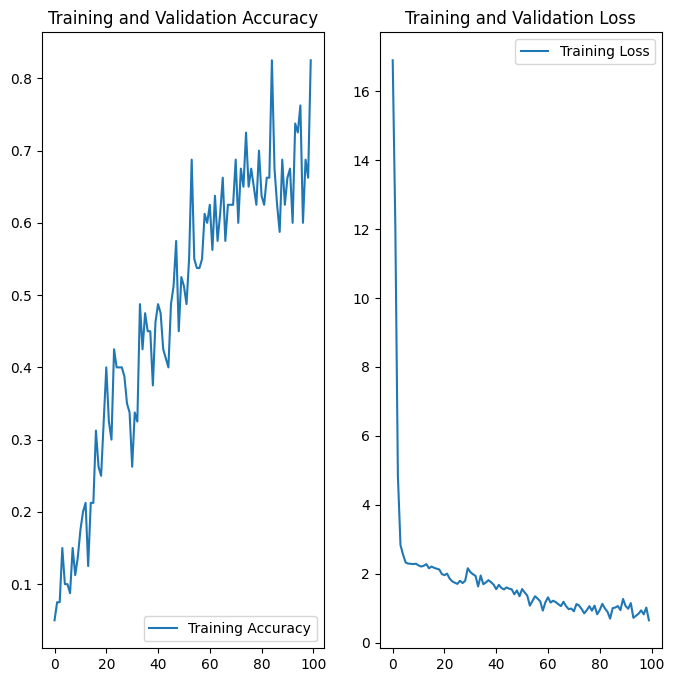

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()